In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
data = pd.read_csv('cancer.csv')
A = data.shape

In [4]:
data.dtypes.head()

id                  int64
diagnosis          object
radius_mean       float64
texture_mean      float64
perimeter_mean    float64
dtype: object

In [5]:
a = data['diagnosis'].value_counts()

In [6]:
per = (data['diagnosis'].value_counts() *100/data['diagnosis'].value_counts().sum() )

In [7]:
data = data.drop(['id','Unnamed: 32'], axis = 1)

In [8]:
data.shape

(569, 31)

In [9]:
data['diagnosis'] = data['diagnosis'].replace(['M','B'],['Y','N'])

In [10]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Y,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,Y,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,Y,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,Y,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,Y,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,Y,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,Y,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,Y,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,Y,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,Y,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


# missing values

In [11]:
data.isnull().sum().head()

diagnosis         0
radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64

# OUTLIERS

In [12]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

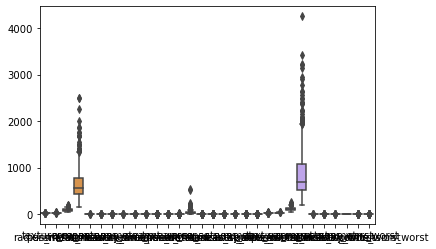

In [13]:
sns.boxplot(data = data)

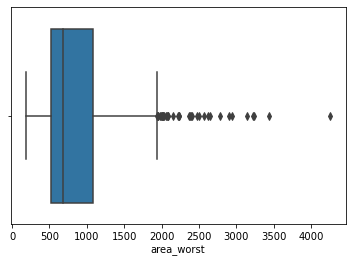

In [14]:
sns.boxplot(data['area_worst'])

In [15]:
data = data[data['area_worst'] < 2300]

In [16]:
B = data.shape
B

(552, 31)

In [17]:
import operator
del_col_rows = tuple(map(operator.sub,A,B))
del_col_rows

(17, 2)

#    **FUNCTIONS**

In [18]:
def shape (x_train,x_test,y_train,y_test):
    print('x_train : ', x_train.shape)
    print('x_test : ', x_test.shape)
    print('y_train : ', y_train.shape)
    print('y_test : ', y_test.shape)

In [19]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def confuse_matrices(model):
    cm = confusion_matrix(y_predict,y_test)
    confuse_matrices = pd.DataFrame(cm, columns = ['predict 1','predict 0'], index = ['actual 1', 'actual 0'])
    sns.heatmap(confuse_matrices, annot = True, fmt = 'd', cbar= False , annot_kws = {'size': 30},linewidths = 0.5, cmap = ListedColormap(['lightskyblue']))
    

In [20]:
from sklearn.metrics import classification_report
def report(model):
    return print(classification_report(y_predict,y_test))

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
def auc(model):
    fpr,fnr,thresholds = roc_curve(y_test,y_predict)
    plt.plot(fpr,fnr)
    plt.text(x = 0.2,y = 0.9, s = ('roc_auc_score' , round(roc_auc_score(y_test,y_predict),3)))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

In [22]:
from sklearn import metrics
def score(model):
    print('accuracy :', metrics.accuracy_score(y_test,y_predict))
    print('recall :', metrics.recall_score(y_test,y_predict))
    print('precision :', metrics.precision_score(y_test,y_predict))
    print('roc_auc_score :' ,metrics.roc_auc_score(y_test,y_predict))
    print('f1_score : ', metrics.f1_score(y_test,y_predict))

# MODEL - 1 :- Bagging

In [23]:
x = data.drop(['diagnosis'], axis = 1)
y = pd.DataFrame(data['diagnosis'])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

In [26]:
shape(x_train,x_test,y_train,y_test)

x_train :  (386, 30)
x_test :  (166, 30)
y_train :  (386, 1)
y_test :  (166, 1)


In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [28]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state= 1))
model_training_1 = model.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
y_predict = model_training_1.predict(x_test)

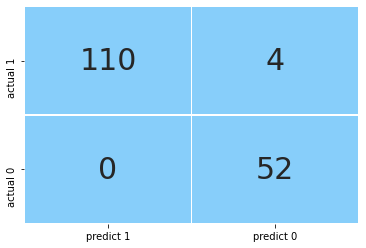

In [30]:
confuse_matrices(model_training_1)

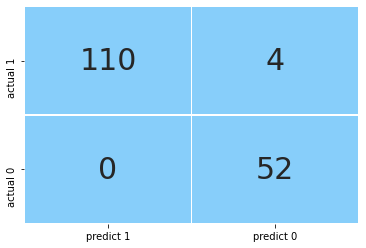

In [31]:
confuse_matrices(model_training_1)

In [32]:
report(model_training_1)

              precision    recall  f1-score   support

           N       1.00      0.96      0.98       114
           Y       0.93      1.00      0.96        52

    accuracy                           0.98       166
   macro avg       0.96      0.98      0.97       166
weighted avg       0.98      0.98      0.98       166



In [33]:
y_predict = pd.DataFrame(data = y_predict, columns= ['y_predict'])
y_predict = y_predict.replace(['Y','N'],[1,0])


In [34]:
y_test = y_test.replace(['Y','N'],[1,0])

In [35]:
score(model_training_1)

accuracy : 0.9759036144578314
recall : 0.9285714285714286
precision : 1.0
roc_auc_score : 0.9642857142857143
f1_score :  0.962962962962963


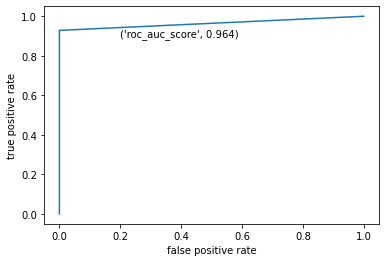

In [36]:
auc(model_training_1)

In [37]:
model_1 = pd.DataFrame({'models':['BAGGING_MODEL'],
                     'accuracy': [metrics.accuracy_score(y_test,y_predict)],
                      'recall': [metrics.recall_score(y_test,y_predict)],
                     'precision' : [metrics.precision_score(y_test,y_predict)],
                     'roc_auc_score ': [metrics.roc_auc_score(y_test,y_predict)],
                      'f1_score ': [metrics.f1_score(y_test,y_predict)]})

In [38]:
model_1

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,BAGGING_MODEL,0.975904,0.928571,1.0,0.964286,0.962963


# MODEL - 2, ADA BOOST

In [39]:
shape(x_train,x_test,y_train,y_test)

x_train :  (386, 30)
x_test :  (166, 30)
y_train :  (386, 1)
y_test :  (166, 1)


In [40]:
from sklearn.ensemble import AdaBoostClassifier
mdl_2 = AdaBoostClassifier(random_state= 1)
ada_boost_classifier = mdl_2.fit(x_train,y_train)

C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
y_predict = ada_boost_classifier.predict(x_test)

In [42]:
y_predict = pd.DataFrame(y_predict, columns= ['y_predict'])
y_predict = y_predict.replace(['Y','N'],[1,0])

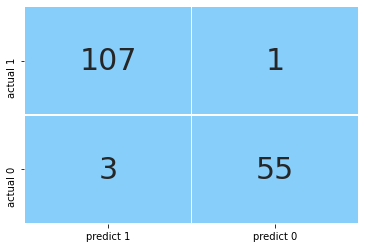

In [43]:
confuse_matrices(ada_boost_classifier)

In [44]:
score(ada_boost_classifier)

accuracy : 0.9759036144578314
recall : 0.9821428571428571
precision : 0.9482758620689655
roc_auc_score : 0.9774350649350649
f1_score :  0.9649122807017544


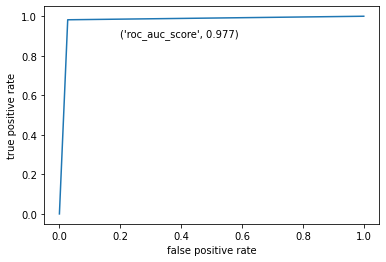

In [45]:
auc(ada_boost_classifier)

In [46]:
report(ada_boost_classifier)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.96        58

    accuracy                           0.98       166
   macro avg       0.98      0.97      0.97       166
weighted avg       0.98      0.98      0.98       166



In [47]:
model_2 = pd.DataFrame({'models':['ada_boost_classifier'],
                        'accuracy': [metrics.accuracy_score(y_test,y_predict)],
                      'recall': [metrics.recall_score(y_test,y_predict)],
                     'precision' : [metrics.precision_score(y_test,y_predict)],
                     'roc_auc_score ': [metrics.roc_auc_score(y_test,y_predict)],
                      'f1_score ': [metrics.f1_score(y_test,y_predict)]})

In [48]:
model_2

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,ada_boost_classifier,0.975904,0.982143,0.948276,0.977435,0.964912


In [49]:
model_1 = model_1.append(model_2)
model_1

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,BAGGING_MODEL,0.975904,0.928571,1.000000,0.964286,0.962963
0,ada_boost_classifier,0.975904,0.982143,0.948276,0.977435,0.964912


# MODEL - 3 XGBM

In [50]:
!pip install xgboost

In [51]:
from xgboost.sklearn import XGBClassifier
xgbm = XGBClassifier(random_state = 1,learning_rate = 0.01)
xgbm_model_3 = xgbm.fit(x_train,y_train)

[10:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HARI KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
y_predict = xgbm_model_3.predict(x_test)

In [53]:
y_predict = pd.DataFrame(data = y_predict, columns = ['y_predict'])
y_predict = y_predict.replace(['Y','N'],[1,0])

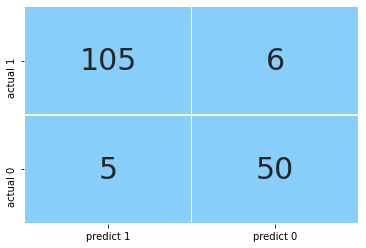

In [54]:
confuse_matrices(xgbm_model_3)

In [55]:
report(xgbm_model_3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.89      0.91      0.90        55

    accuracy                           0.93       166
   macro avg       0.92      0.93      0.93       166
weighted avg       0.93      0.93      0.93       166



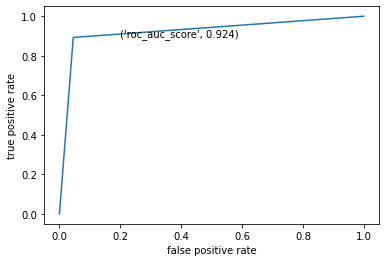

In [56]:
auc(xgbm_model_3)

In [57]:
score(xgbm_model_3)

accuracy : 0.9337349397590361
recall : 0.8928571428571429
precision : 0.9090909090909091
roc_auc_score : 0.9237012987012987
f1_score :  0.9009009009009009


In [58]:
model_3 = pd.DataFrame({'models':['xgbm_model_3'],
                        'accuracy': [metrics.accuracy_score(y_test,y_predict)],
                      'recall': [metrics.recall_score(y_test,y_predict)],
                     'precision' : [metrics.precision_score(y_test,y_predict)],
                     'roc_auc_score ': [metrics.roc_auc_score(y_test,y_predict)],
                      'f1_score ': [metrics.f1_score(y_test,y_predict)]})

In [59]:
model_3

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,xgbm_model_3,0.933735,0.892857,0.909091,0.923701,0.900901


In [60]:
model_1 = model_1.append(model_3)

In [61]:
model_1

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,BAGGING_MODEL,0.975904,0.928571,1.000000,0.964286,0.962963
0,ada_boost_classifier,0.975904,0.982143,0.948276,0.977435,0.964912
0,xgbm_model_3,0.933735,0.892857,0.909091,0.923701,0.900901


# DESCION TREE

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [63]:
tuned_parameters = [{'criterion' : ['gini','entropy'], 'max_depth' : [3,4]}]

In [64]:
grid_mdl = GridSearchCV(estimator  = DecisionTreeClassifier(), param_grid = tuned_parameters, cv = 5)

In [65]:
grid_parameters = grid_mdl.fit(x_train,y_train)

In [66]:
grid_parameters.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [67]:
descion_tree_mdl = DecisionTreeClassifier(criterion = 'gini', max_depth = 3 )
descion_tree_mdl = descion_tree_mdl.fit(x_train,y_train)

In [68]:
y_predict = descion_tree_mdl.predict(x_test)

In [69]:
y_predict = pd.DataFrame(data = y_predict, columns = ['y_predict'])
y_predict = y_predict.replace(['Y','N'],[1,0])

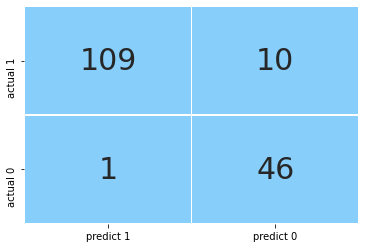

In [70]:
confuse_matrices(descion_tree_mdl)

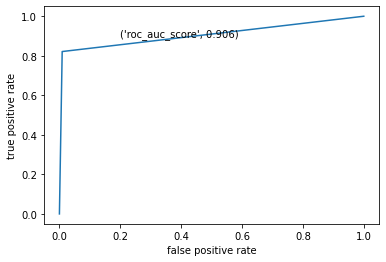

In [71]:
auc(descion_tree_mdl)

In [72]:
score(descion_tree_mdl)

accuracy : 0.9337349397590361
recall : 0.8214285714285714
precision : 0.9787234042553191
roc_auc_score : 0.9061688311688312
f1_score :  0.8932038834951456


In [73]:
model_4 = pd.DataFrame({'models':['descion_tree_mdl'],
                        'accuracy': [metrics.accuracy_score(y_test,y_predict)],
                      'recall': [metrics.recall_score(y_test,y_predict)],
                     'precision' : [metrics.precision_score(y_test,y_predict)],
                     'roc_auc_score ': [metrics.roc_auc_score(y_test,y_predict)],
                      'f1_score ': [metrics.f1_score(y_test,y_predict)]})

In [74]:
model_1 = model_1.append(model_4)

In [75]:
model_1

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,BAGGING_MODEL,0.975904,0.928571,1.000000,0.964286,0.962963
0,ada_boost_classifier,0.975904,0.982143,0.948276,0.977435,0.964912
0,xgbm_model_3,0.933735,0.892857,0.909091,0.923701,0.900901
0,descion_tree_mdl,0.933735,0.821429,0.978723,0.906169,0.893204


# logistic model

In [76]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [77]:
log_mdl = LogisticRegression()


In [78]:
log_mdl = log_mdl.fit(x_train,y_train)

In [79]:
y_predict = log_mdl.predict(x_test)

In [80]:
y_predict = pd.DataFrame(data = y_predict, columns = ['y_predict'])
y_predict = y_predict.replace(['Y','N'],[1,0])

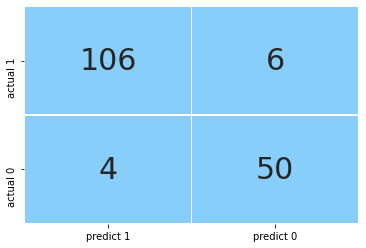

In [81]:
confuse_matrices(log_mdl)

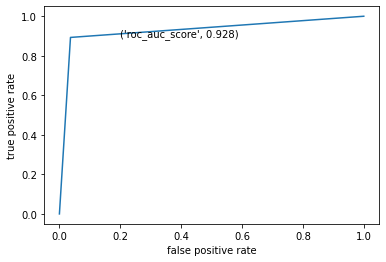

In [82]:
auc(log_mdl)

In [83]:
score(log_mdl)

accuracy : 0.9397590361445783
recall : 0.8928571428571429
precision : 0.9259259259259259
roc_auc_score : 0.9282467532467532
f1_score :  0.9090909090909091


In [84]:
model_5 = pd.DataFrame({'models':['log_mdl'],
                        'accuracy': [metrics.accuracy_score(y_test,y_predict)],
                      'recall': [metrics.recall_score(y_test,y_predict)],
                     'precision' : [metrics.precision_score(y_test,y_predict)],
                     'roc_auc_score ': [metrics.roc_auc_score(y_test,y_predict)],
                      'f1_score ': [metrics.f1_score(y_test,y_predict)]})

In [85]:
model_1 = model_1.append(model_5)

In [86]:
model_1

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,BAGGING_MODEL,0.975904,0.928571,1.000000,0.964286,0.962963
0,ada_boost_classifier,0.975904,0.982143,0.948276,0.977435,0.964912
0,xgbm_model_3,0.933735,0.892857,0.909091,0.923701,0.900901
0,descion_tree_mdl,0.933735,0.821429,0.978723,0.906169,0.893204
0,log_mdl,0.939759,0.892857,0.925926,0.928247,0.909091


# k-NN 

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [88]:
parameters = [{'n_neighbors': [3,5],'metric' :['minkowski','euclidean']}]

In [89]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters,cv = 5, scoring= 'accuracy')

In [90]:
grid_mdl = grid_search.fit(x_train,y_train)

In [91]:
grid_mdl.best_params_

{'metric': 'minkowski', 'n_neighbors': 5}

In [92]:
knn_mdl = KNeighborsClassifier(metric = 'minkowski', n_neighbors =  5)

In [93]:
knn_mdl = knn_mdl.fit(x_train,y_train)

In [94]:
y_predict = knn_mdl.predict(x_test)

In [95]:
y_predict = pd.DataFrame(data = y_predict, columns = ['y_predict'])
y_predict = y_predict.replace(['Y','N'],[1,0])

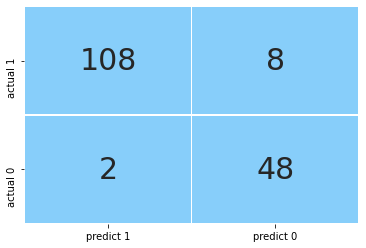

In [96]:
confuse_matrices(knn_mdl)

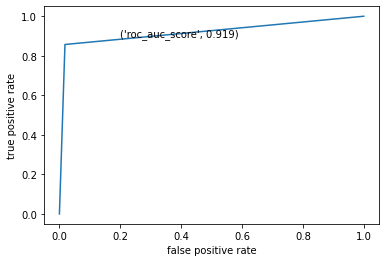

In [97]:
auc(knn_mdl)

In [98]:
score(knn_mdl)

accuracy : 0.9397590361445783
recall : 0.8571428571428571
precision : 0.96
roc_auc_score : 0.9194805194805195
f1_score :  0.9056603773584904


In [99]:
model_6 = pd.DataFrame({'models':['knn_mdl'],
                        'accuracy': [metrics.accuracy_score(y_test,y_predict)],
                      'recall': [metrics.recall_score(y_test,y_predict)],
                     'precision' : [metrics.precision_score(y_test,y_predict)],
                     'roc_auc_score ': [metrics.roc_auc_score(y_test,y_predict)],
                      'f1_score ': [metrics.f1_score(y_test,y_predict)]})

In [100]:
model_1 = model_1.append(model_6)

In [101]:
model_1

,models,accuracy,recall,precision,roc_auc_score,f1_score
0,BAGGING_MODEL,0.975904,0.928571,1.000000,0.964286,0.962963
0,ada_boost_classifier,0.975904,0.982143,0.948276,0.977435,0.964912
0,xgbm_model_3,0.933735,0.892857,0.909091,0.923701,0.900901
0,descion_tree_mdl,0.933735,0.821429,0.978723,0.906169,0.893204
0,log_mdl,0.939759,0.892857,0.925926,0.928247,0.909091
0,knn_mdl,0.939759,0.857143,0.960000,0.919481,0.905660
